# ASSIGNMENT ACTIVITY ONE

In [65]:
# Import the python libraries and packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [66]:
# Load the csv file as reviews
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [67]:
# Any missing number?
reviews.info()
print(reviews.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
(2000, 11)


In [68]:
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [69]:
# 2. Drop Unnecessary columns.
reviews_final = reviews.drop(['language', 'platform'],
                            axis=1)

# View the DataFrame.
print(reviews_final.shape)
print(reviews_final.head())
reviews_final.info()

(2000, 9)
   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% 

In [70]:
reviews_final.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [71]:
# 3. Rename the columns.
reviews_new = reviews_final.rename(columns={'remuneration (k£)': 'renumeration',
                                           'spending_score (1-100)':'spending_score'})

# View the column's name.
reviews_new.head()
print(reviews_new.shape)
reviews_new.info()

(2000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [72]:
#4. Save the DataFrame as CSV file.
# Create a csv as output.
reviews_new.to_csv('reviews_new.csv', encoding='utf-8', index=False)

In [73]:
# Import new CSV file with Pandas.
reviewss = pd.read_csv('reviews_new.csv')

# View the DataFrame.
reviewss.head()
reviewss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


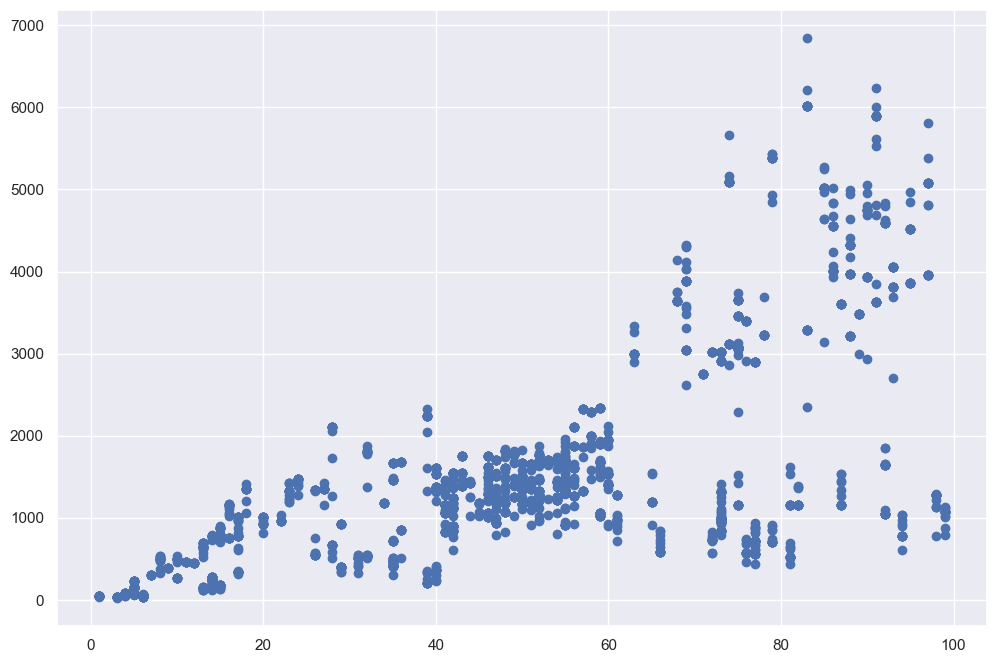

In [74]:
# 5. Linear Regression model.
# 5a. Spending vs Loyalty.
# Define Independent Variable.
X = reviews_new["spending_score"]

# Define Dependent variable.
y = reviews_new["loyalty_points"]

# Check for linearity.
plt.scatter(X,y)

In [75]:
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = reviews_new).fit()

# view test summary.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 30 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        11:55:42   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the Standard error.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
X             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [77]:
# Fit the linear regression model.
# Create the linear regression model.
# Set the the coefficient to 33.061693 and the constant to -75.052663.
y_pred = (-75.052663) + 33.061693 * reviews_new["spending_score"]

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

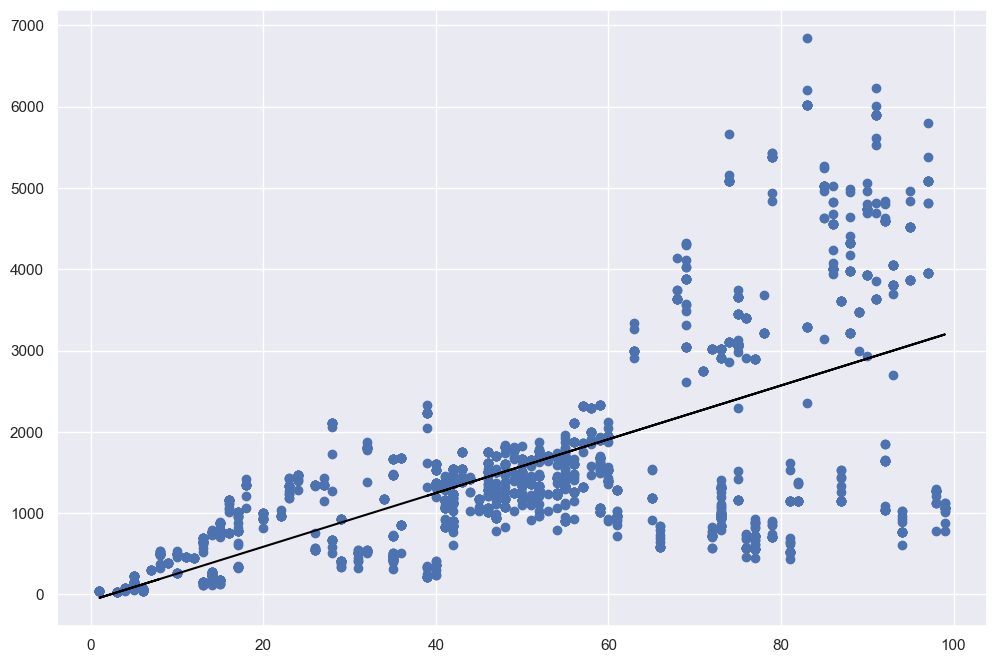

In [78]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')

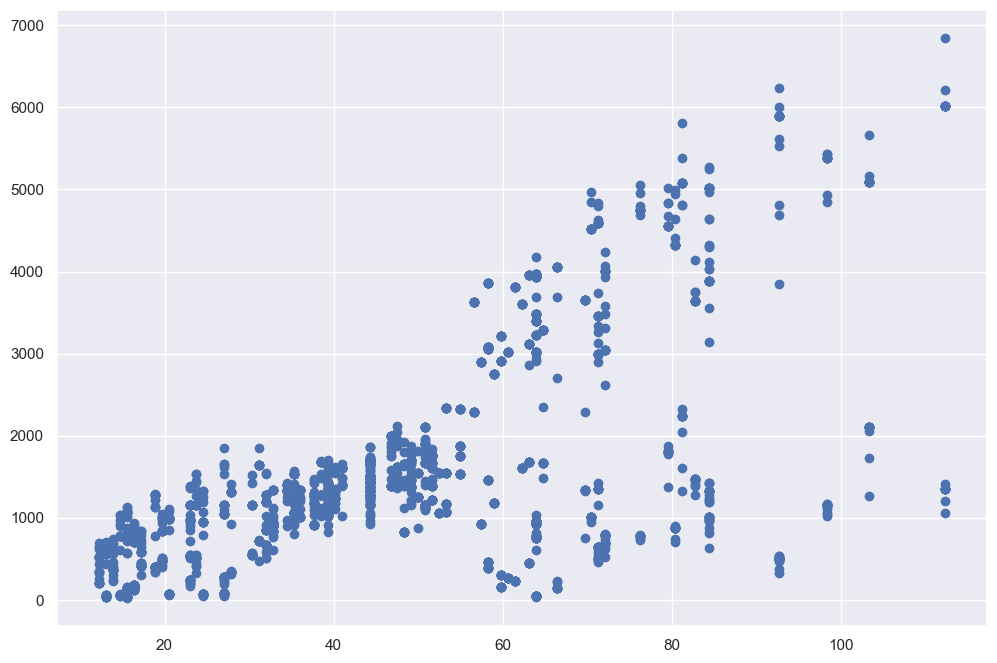

In [79]:
# 5b. renumeration vs loyalty.
# Define Independent Variable.
X = reviews_new["renumeration"]

# Define Dependent variable.
y = reviews_new["loyalty_points"]

# Check for linearity.
plt.scatter(X,y)

In [80]:
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = reviews_new).fit()

# view test summary.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 30 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        11:55:45   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the Standard error.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
X            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
X             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [82]:
# Fit the linear regression model.
# Create the linear regression model.
# Set the the coefficient to 34.187825 and the constant to -65.686513.
y_pred = (-65.686513) + 34.187825 *  reviews_new["renumeration"]

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: renumeration, Length: 2000, dtype: float64

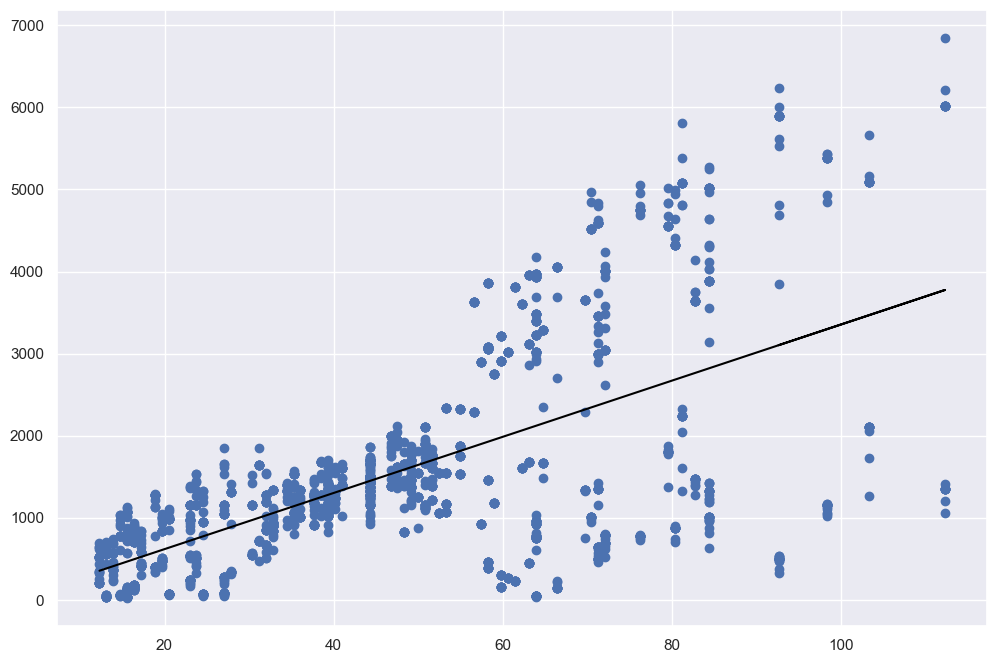

In [83]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')

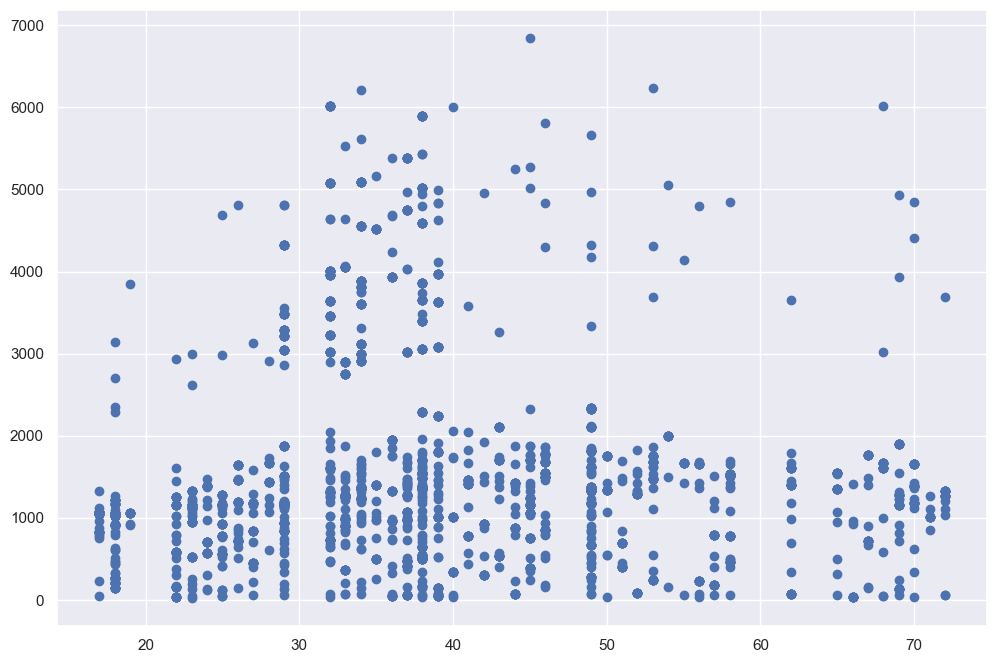

In [84]:
# 5c. Age and Loyalty.
# Define Independent Variable.
X = reviews_new["age"]

# Define Dependent variable.
y = reviews_new["loyalty_points"]

# Check for linearity.
plt.scatter(X,y)

In [85]:
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = reviews_new).fit()

# view test summary.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 30 Dec 2022   Prob (F-statistic):             0.0577
Time:                        11:55:47   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the Standard error.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    1736.517739
X              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
X             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [87]:
# Fit the linear regression model.
# Create the linear regression model.
# Set the the coefficient to -4.012805 and the constant to 1736.517739.
y_pred = (1736.517739) + (-4.012805) * reviews_new["age"]

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

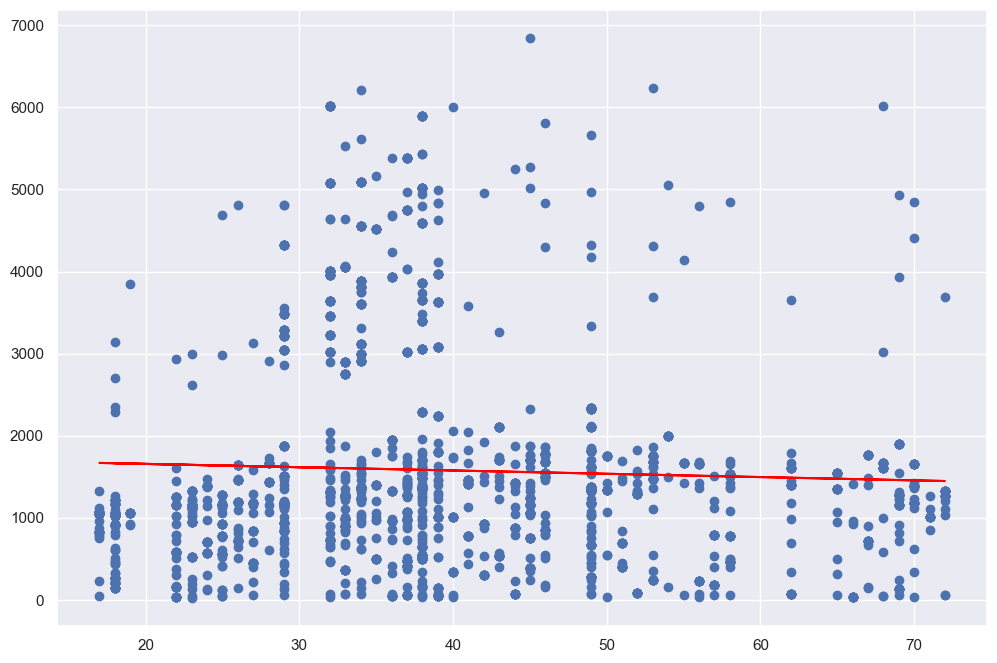

In [88]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='red')

# ASSIGNMENT ACTIVITY TWO

In [89]:
# Prepare the workstation.
# Import all the necessary packages.
import numpy as np
import pandas as pd

import warnings  
warnings.filterwarnings('ignore')

# Import the data to python.
reviews_new = pd.read_csv('reviews_new.csv')

# view the DataFrame
print(reviews_new.info())
reviews_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


# 2. Prepare the data for clustering

In [90]:
# Drop Unnecessary columns.
df2 = reviews_new.drop(['gender', 'age', 'loyalty_points', 'product', 'review', 'summary'],
                            axis=1)
# Explore the data.
df2.info
print(df2.shape)
print(df2.columns)
df2.describe()

(2000, 3)
Index(['renumeration', 'spending_score', 'education'], dtype='object')


,renumeration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


# 3. Plot scattereplot and pairplot.

<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

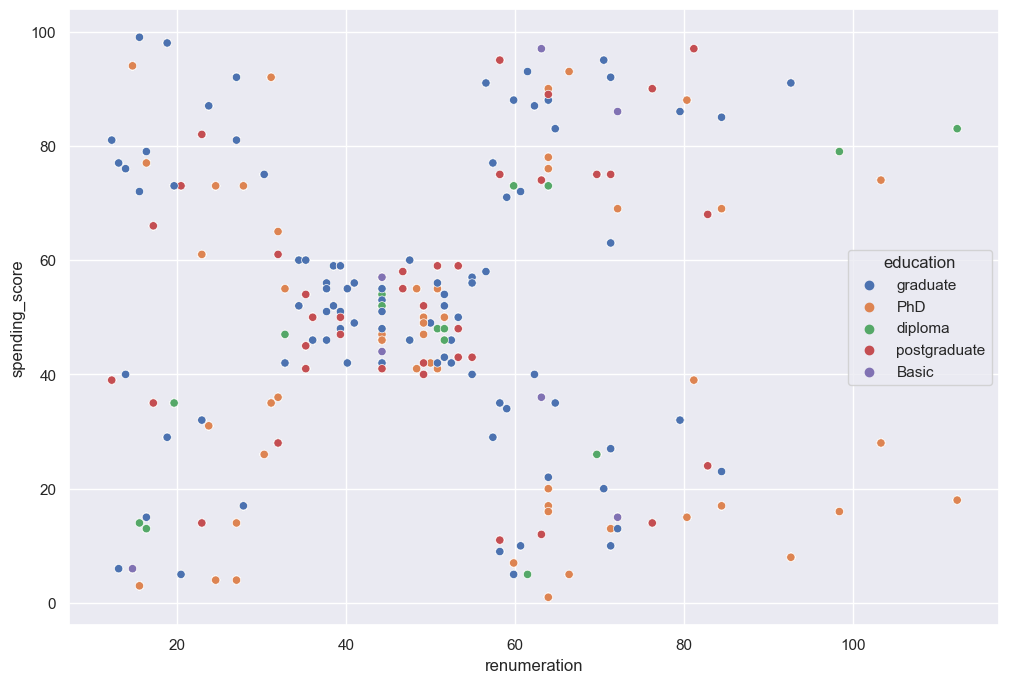

In [91]:
# Visualise the data using Scattered plot


# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='renumeration',
                y='spending_score',
                data=df2,
               hue='education')

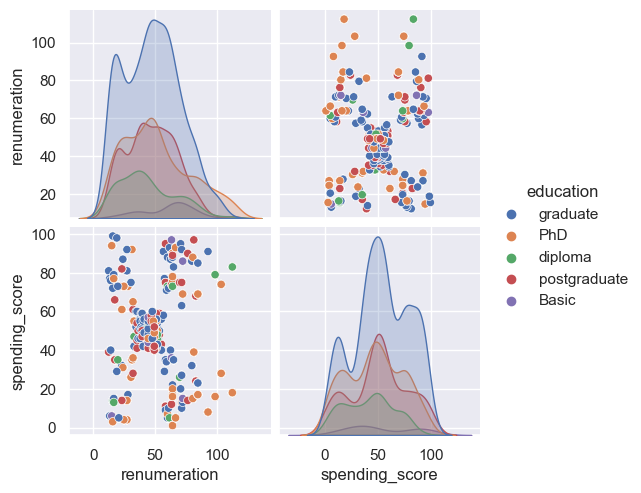

In [92]:
# Create a pairplot with Seaborn.
x = df2[['renumeration', 'spending_score']]

sns.pairplot(df2,
             vars=x,
             hue='education',
             diag_kind='kde')

# 4. Elbow and Silhoutte methods to determine optimal number of clusters

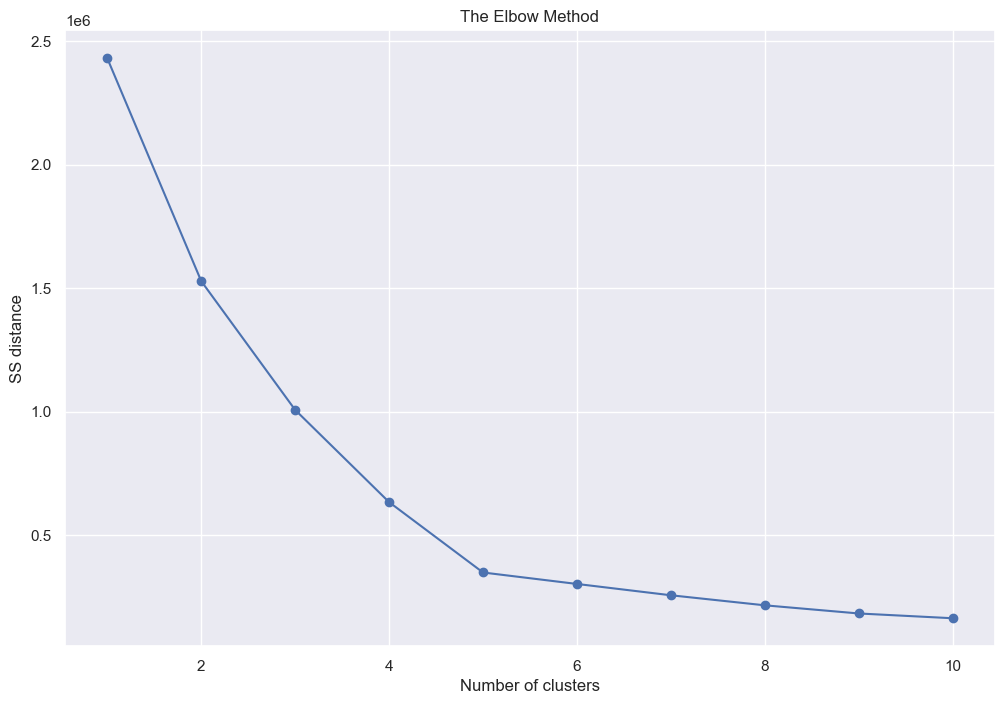

In [93]:
# improve the accuracy

# The Elbow method

# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

The Elbow method is used to determine the optimal number of clusters in K-means.

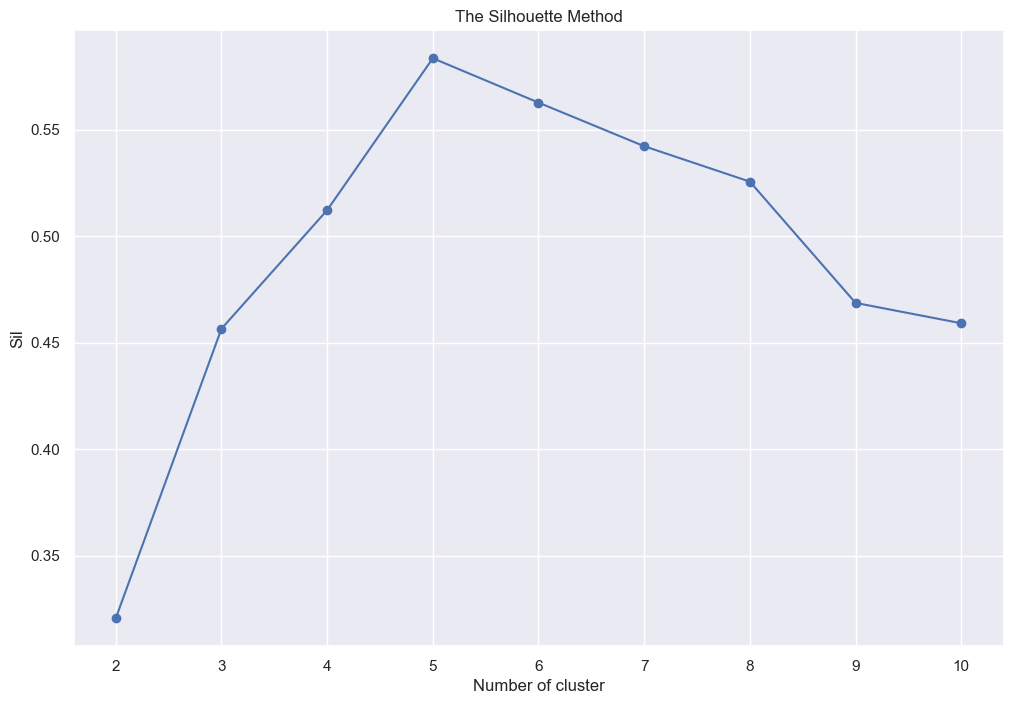

In [94]:
# The Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10
for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                               labels,
                               metric='euclidean'))
# Plot the silhouette method
plt.plot(range(2, kmax+1),
        sil,
        marker='o')
# Insert labels and title
plt.title("The Silhouette Method")
plt.xlabel("Number of cluster")
plt.ylabel("Sil")
plt.show()

The Silhoutte method computes silhoutte coefficient of each point. It provides a succint graphical representation of how well each object is been classified.

# 5. Selecting the number of clusters
# Evaluate and fit the model

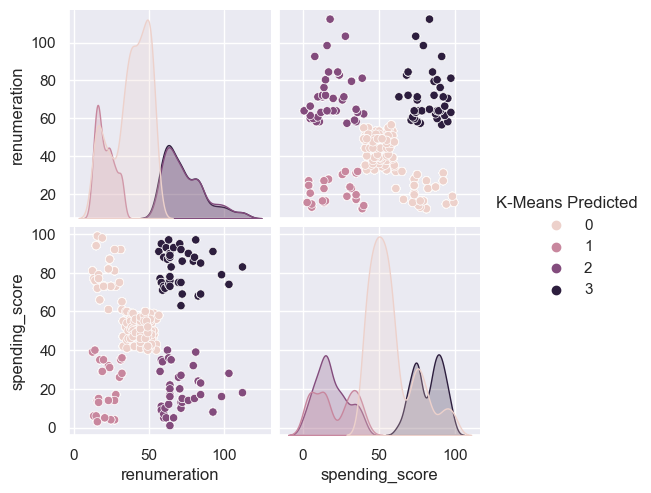

In [95]:
# Select the number of clusters

# 5a. Evaluate and fit the model
# Use three clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 2000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [96]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [97]:
#  Visualise the clusters.
# View the K-Means predicted.
print(x.head())

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  0
2         13.12               6                  1
3         13.12              77                  0
4         13.94              40                  1


<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

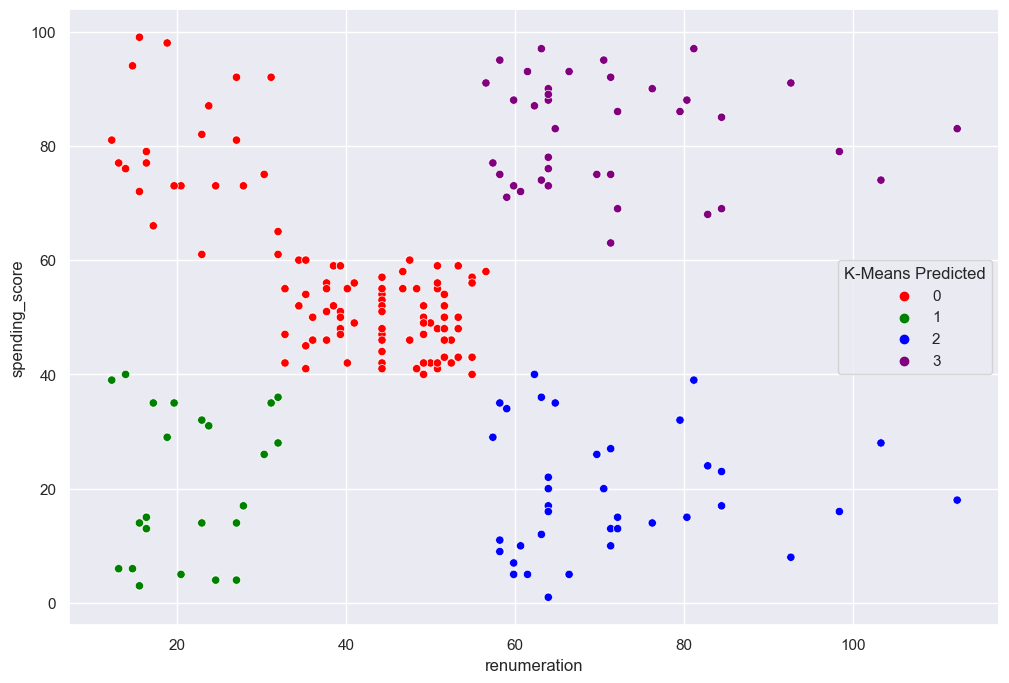

In [98]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'purple'])

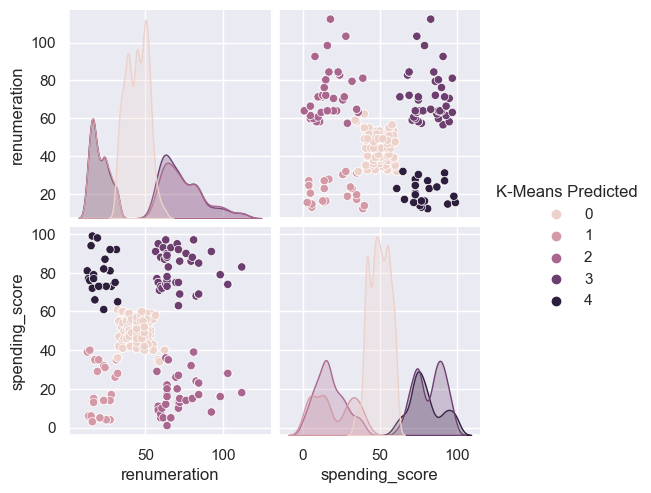

In [99]:
# 5b. Select the number of clusters

# 5a. Evaluate and fit the model
# Use three clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [100]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [101]:
# Visualise the clusters.
# View the K-Means predicted.
print(x.head())

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

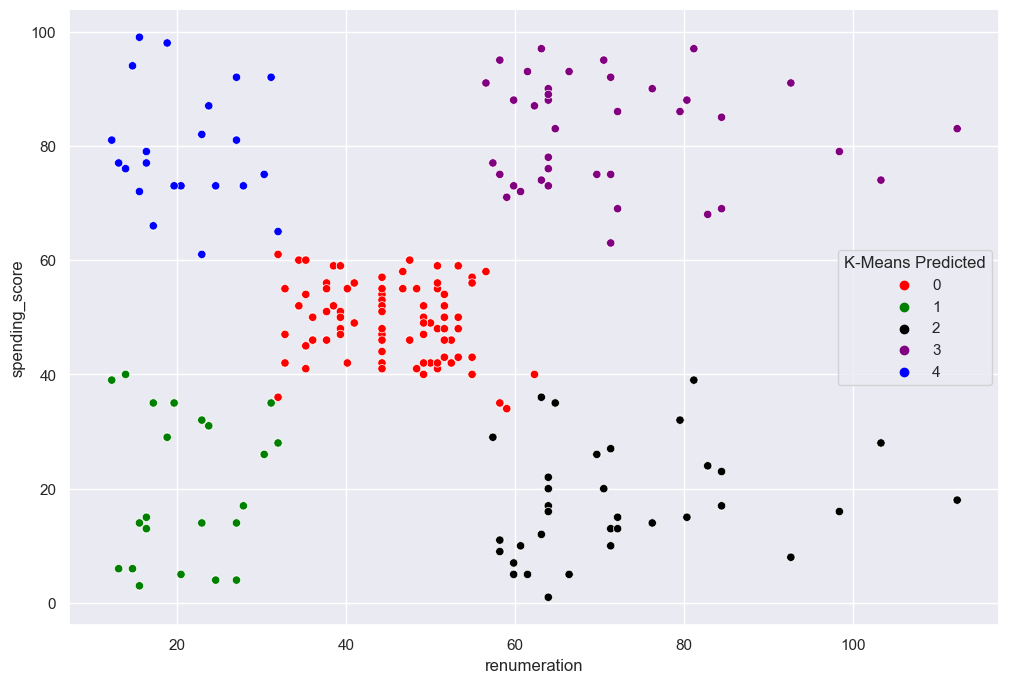

In [102]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'black', 'purple', 'blue'])

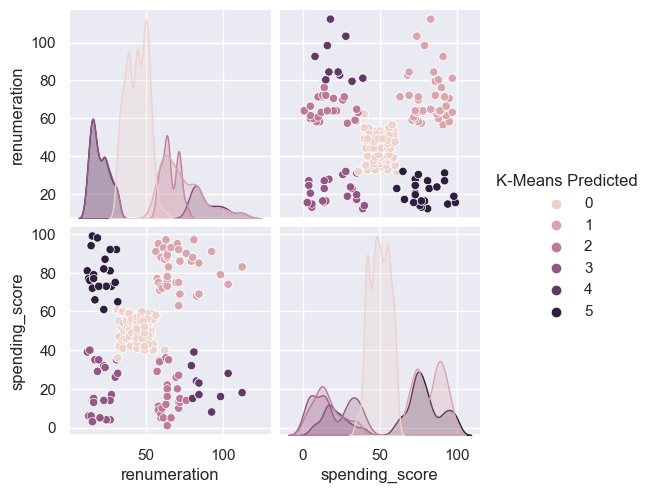

In [103]:
# Select the number of clusters

# 5c. Evaluate and fit the model
# Use three clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [104]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

In [105]:
#  Visualise the clusters.
# View the K-Means predicted.
print(x.head())

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  5
2         13.12               6                  3
3         13.12              77                  5
4         13.94              40                  3


<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

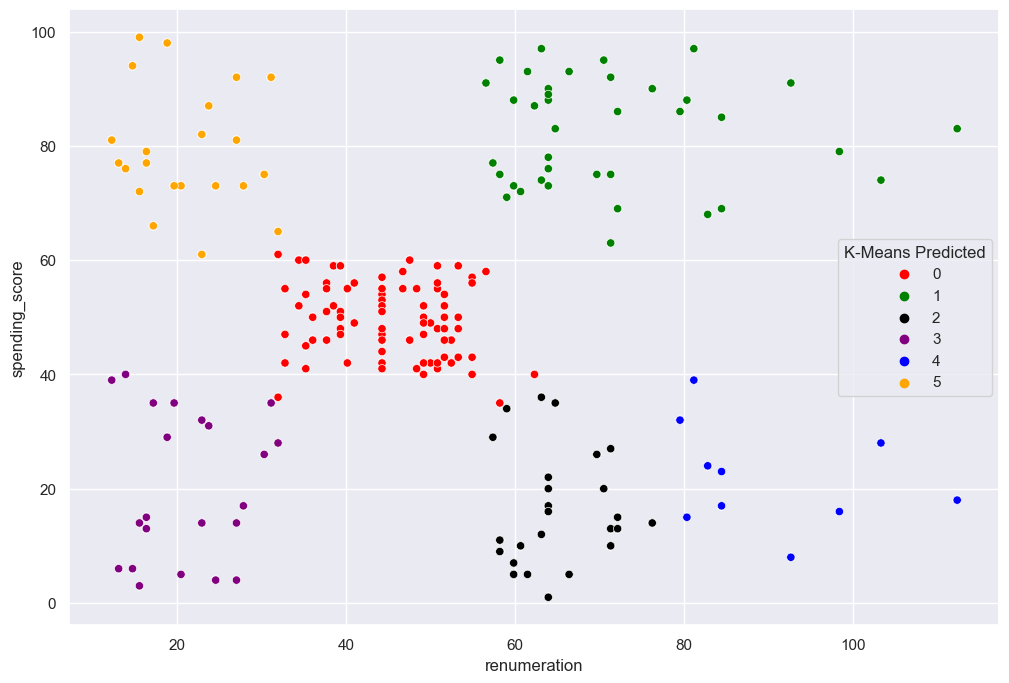

In [106]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'black', 'purple', 'blue', 'orange'])

# Week 3 Assignment: NLP using python 

# 1. Load and explore the data

In [107]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [108]:
# Load the dataset.
df3 = pd.read_csv('turtle_reviews.csv')

# View the dataframe
df3.shape

(2000, 11)

# 2. pre-processing the data.

In [109]:
# Drop the empty row.
df3.dropna(subset=['review','summary'], inplace=True)

# View the shape of the dataframe
df3.shape

(2000, 11)

In [110]:
# Transform data to lowercase.
# review
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [111]:
# Transform to lowercase.
# summary
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [112]:
# Replace all the punctuation in review column
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# Preview the result.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [113]:
# Replace all the punctuation in summary column
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [114]:
# Check the number of duplicate values in the review column.
df3.review.duplicated().sum()

50

In [115]:
# Drop duplicates.
rev = df3.drop_duplicates(subset=['review'])

# Preview data.
rev.reset_index(inplace=True)
rev.head()

,index,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,0,Male,18,12.30,39,210,graduate,EN,Web,453,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,Male,23,12.30,81,524,graduate,EN,Web,466,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,Female,22,13.12,6,40,graduate,EN,Web,254,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,Female,25,13.12,77,562,graduate,EN,Web,263,amazing buy bought it as a gift for our new dm...,five stars
4,4,Female,33,13.94,40,366,graduate,EN,Web,291,as my review of gf9s previous screens these we...,money trap


In [116]:
# View the data shape.
rev.shape

(1950, 12)

In [117]:
# Check the number of duplicate values in the summary column.
df3.summary.duplicated().sum()

649

In [118]:
# Drop duplicates.
summ = df3.drop_duplicates(subset=['summary'])

# Preview data.
summ.reset_index(inplace=True)
summ.head()

,index,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,0,Male,18,12.30,39,210,graduate,EN,Web,453,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,Male,23,12.30,81,524,graduate,EN,Web,466,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,Female,22,13.12,6,40,graduate,EN,Web,254,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,Female,25,13.12,77,562,graduate,EN,Web,263,amazing buy bought it as a gift for our new dm...,five stars
4,4,Female,33,13.94,40,366,graduate,EN,Web,291,as my review of gf9s previous screens these we...,money trap


In [119]:
# View thee shape
summ.shape

(1351, 12)

# 3. Tokenization

In [120]:
# Tokenise the words for review column
rev['tokens'] = rev['review'].apply(word_tokenize)

# Preview data.
rev['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [121]:
# Define an empty list of tokens.
all_tokens = []

for i in range(rev.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + rev['tokens'][i]

In [122]:
# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5449, 'and': 3233, 'to': 3162, 'a': 3159, 'of': 2487, 'i': 2089, 'it': 2082, 'is': 1781, 'this': 1774, 'game': 1668, ...})

In [123]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in all_tokens if word.isalnum()]

In [124]:
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

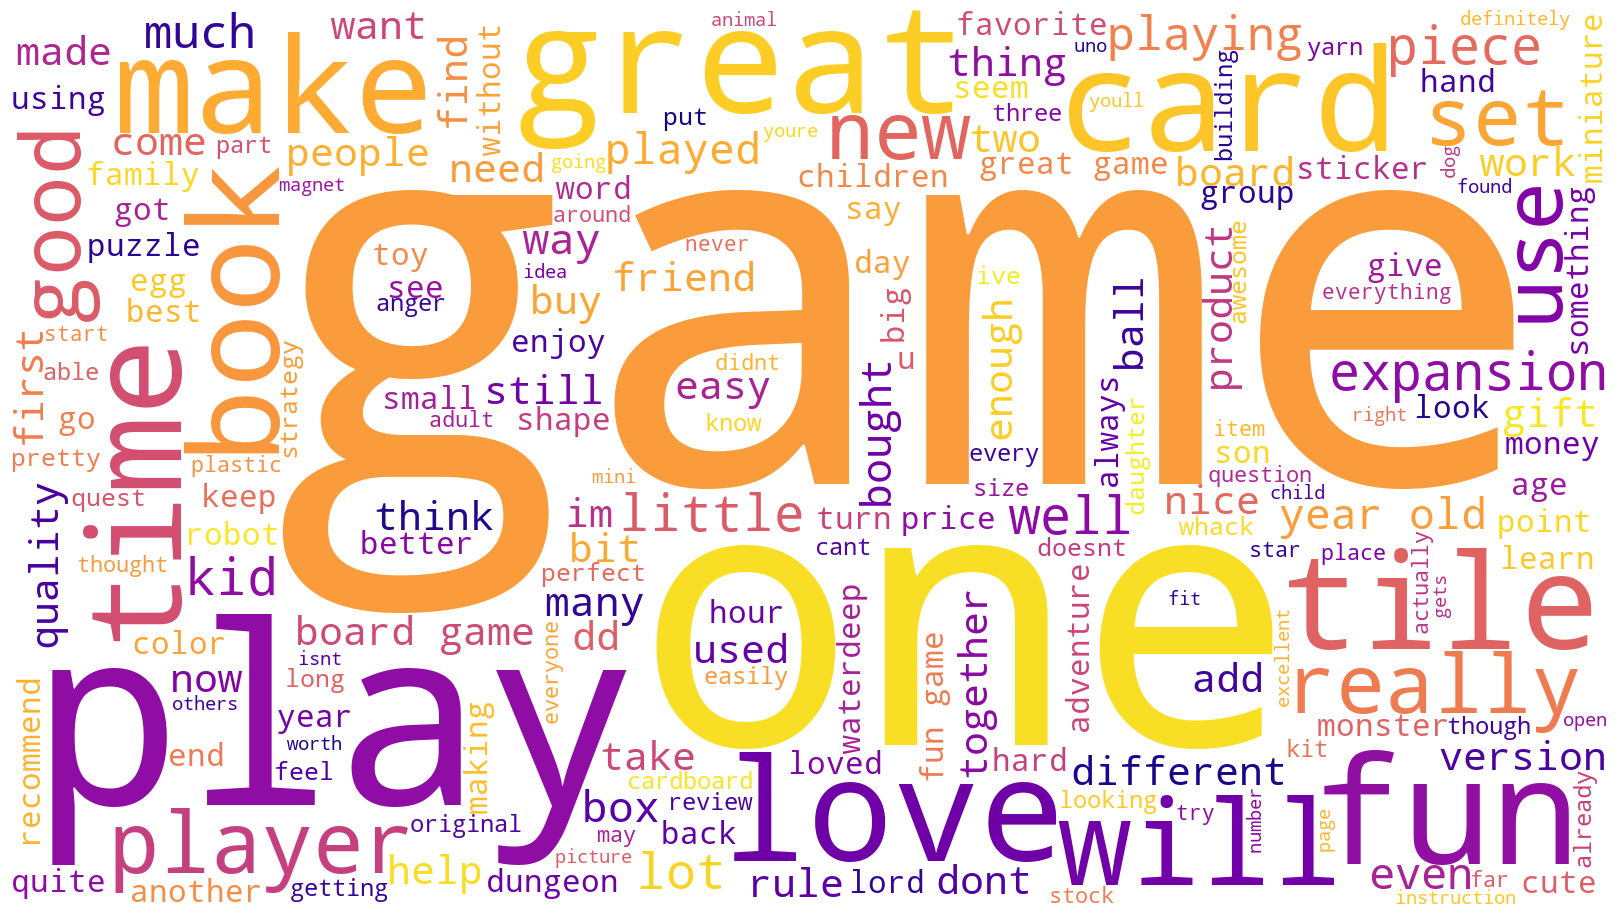

In [125]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [126]:
# Tokenise the words for summary column
summ['tokens'] = summ['summary'].apply(word_tokenize)

# Preview data.
summ['tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens, dtype: object

In [127]:
# Define an empty list of tokens.
all_tokens = []

for i in range(summ.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + summ['tokens'][i]

In [128]:
# Calculate the frequency distribution.
fdist1 = FreqDist(all_tokens)

# Preview data.
fdist1

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

In [129]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in all_tokens if word.isalnum()]

In [130]:
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens3 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens3_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens3_string = tokens3_string + value + ' '

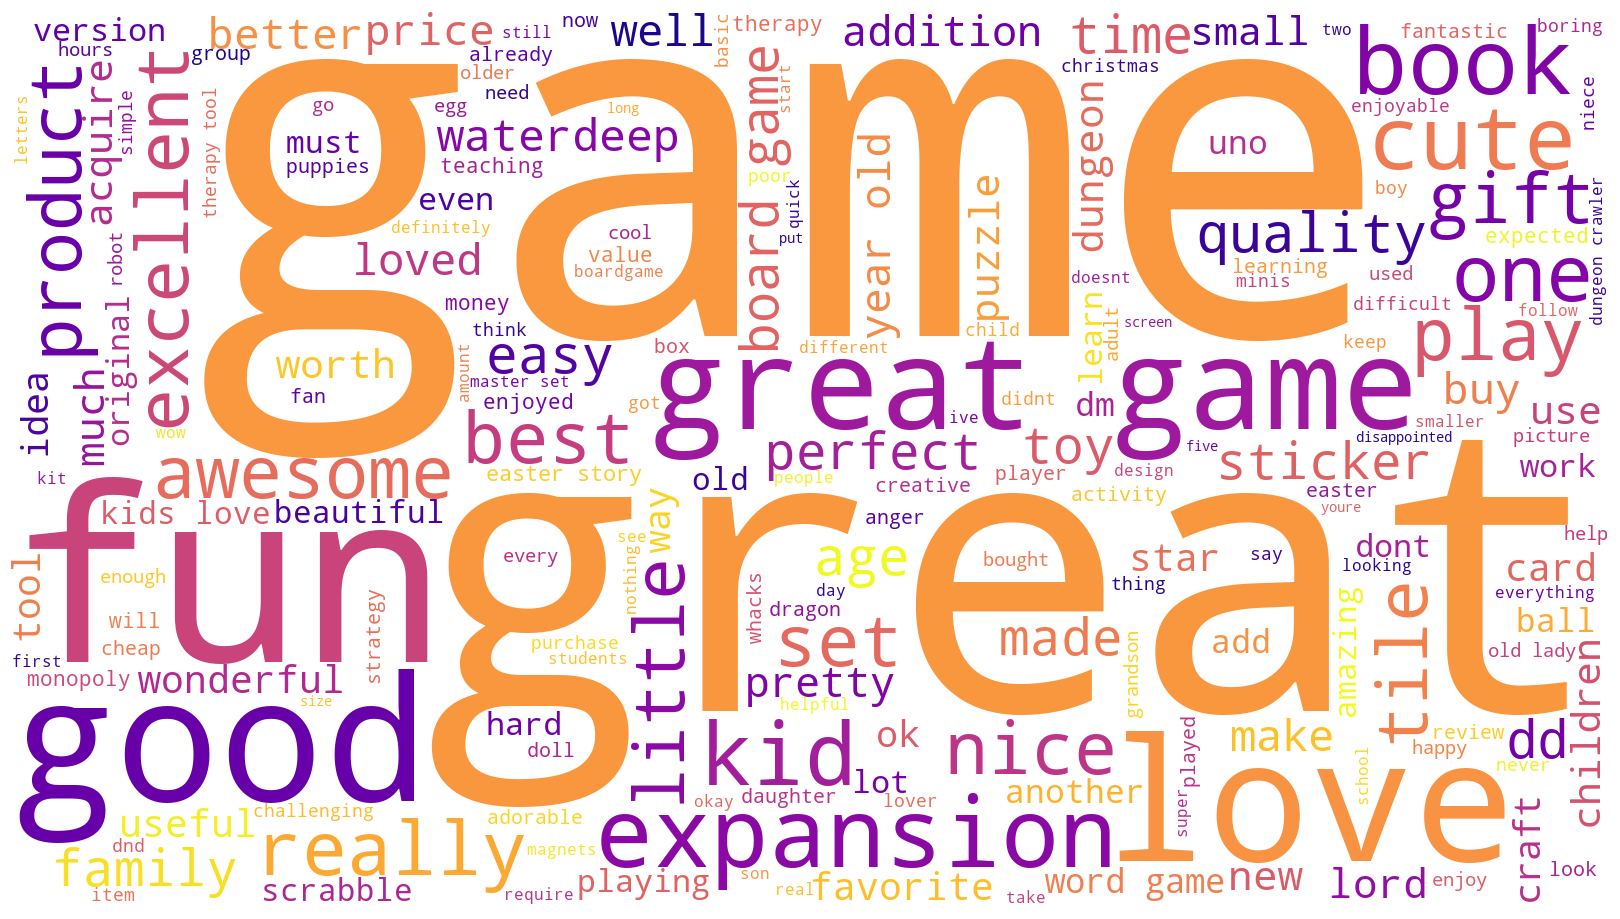

In [131]:
# Create a WordCloud.
wordcloud1 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens3_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# 4. Frequency Distribution and Polarity

In [132]:
# View the review frequency distribution.
fdistrev = FreqDist(tokens2)

# Preview the data.
fdistrev

FreqDist({'game': 1668, 'great': 579, 'fun': 549, 'one': 530, 'play': 502, 'like': 414, 'love': 322, 'really': 319, 'get': 319, 'cards': 301, ...})

In [133]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
game,1668
great,579
fun,549
one,530
play,502
like,414
love,322
really,319
get,319


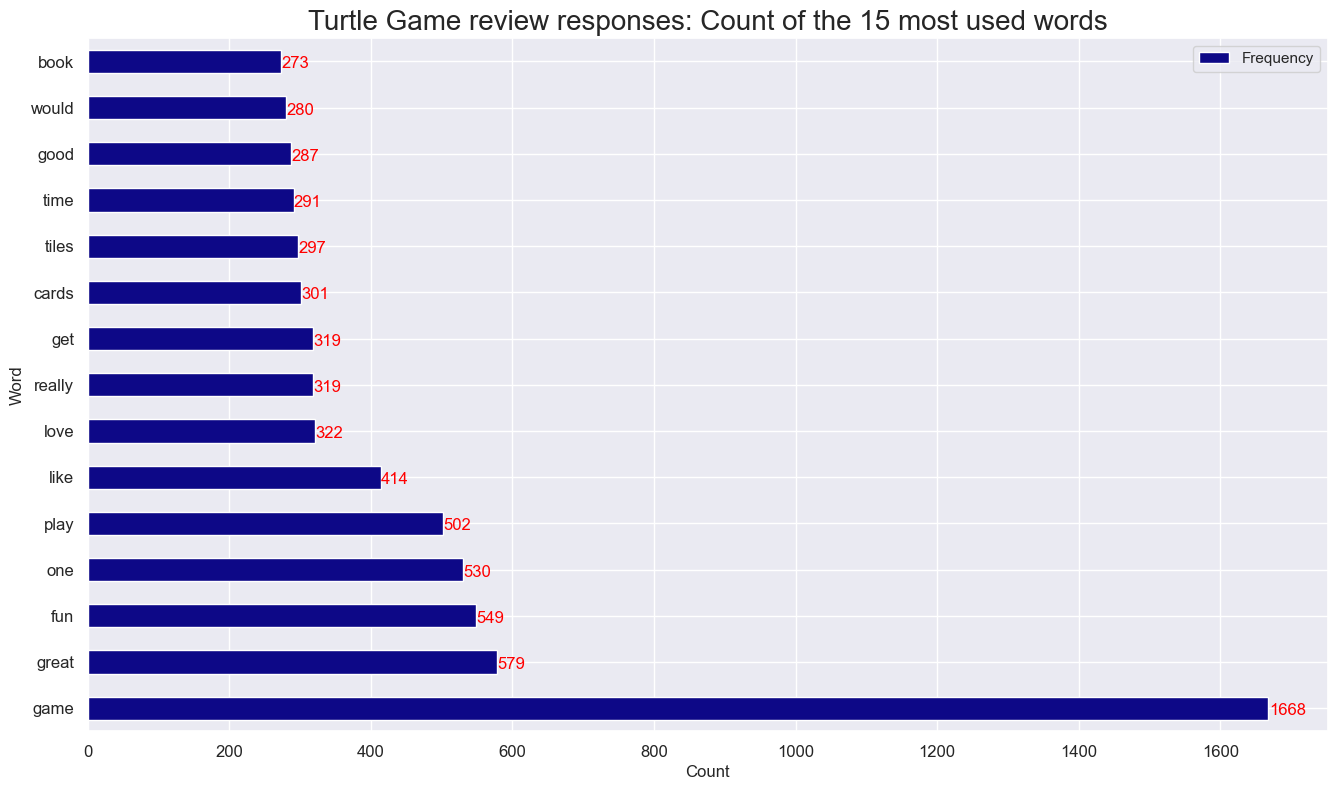

In [134]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Game review responses: Count of the 15 most used words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [135]:
# View the summary frequency distribution.
fdistsumm = FreqDist(tokens3)

# Preview the data.
fdistsumm

FreqDist({'game': 268, 'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [136]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts1 = pd.DataFrame(Counter(tokens3).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts1

,Frequency
Word,
game,268
great,237
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


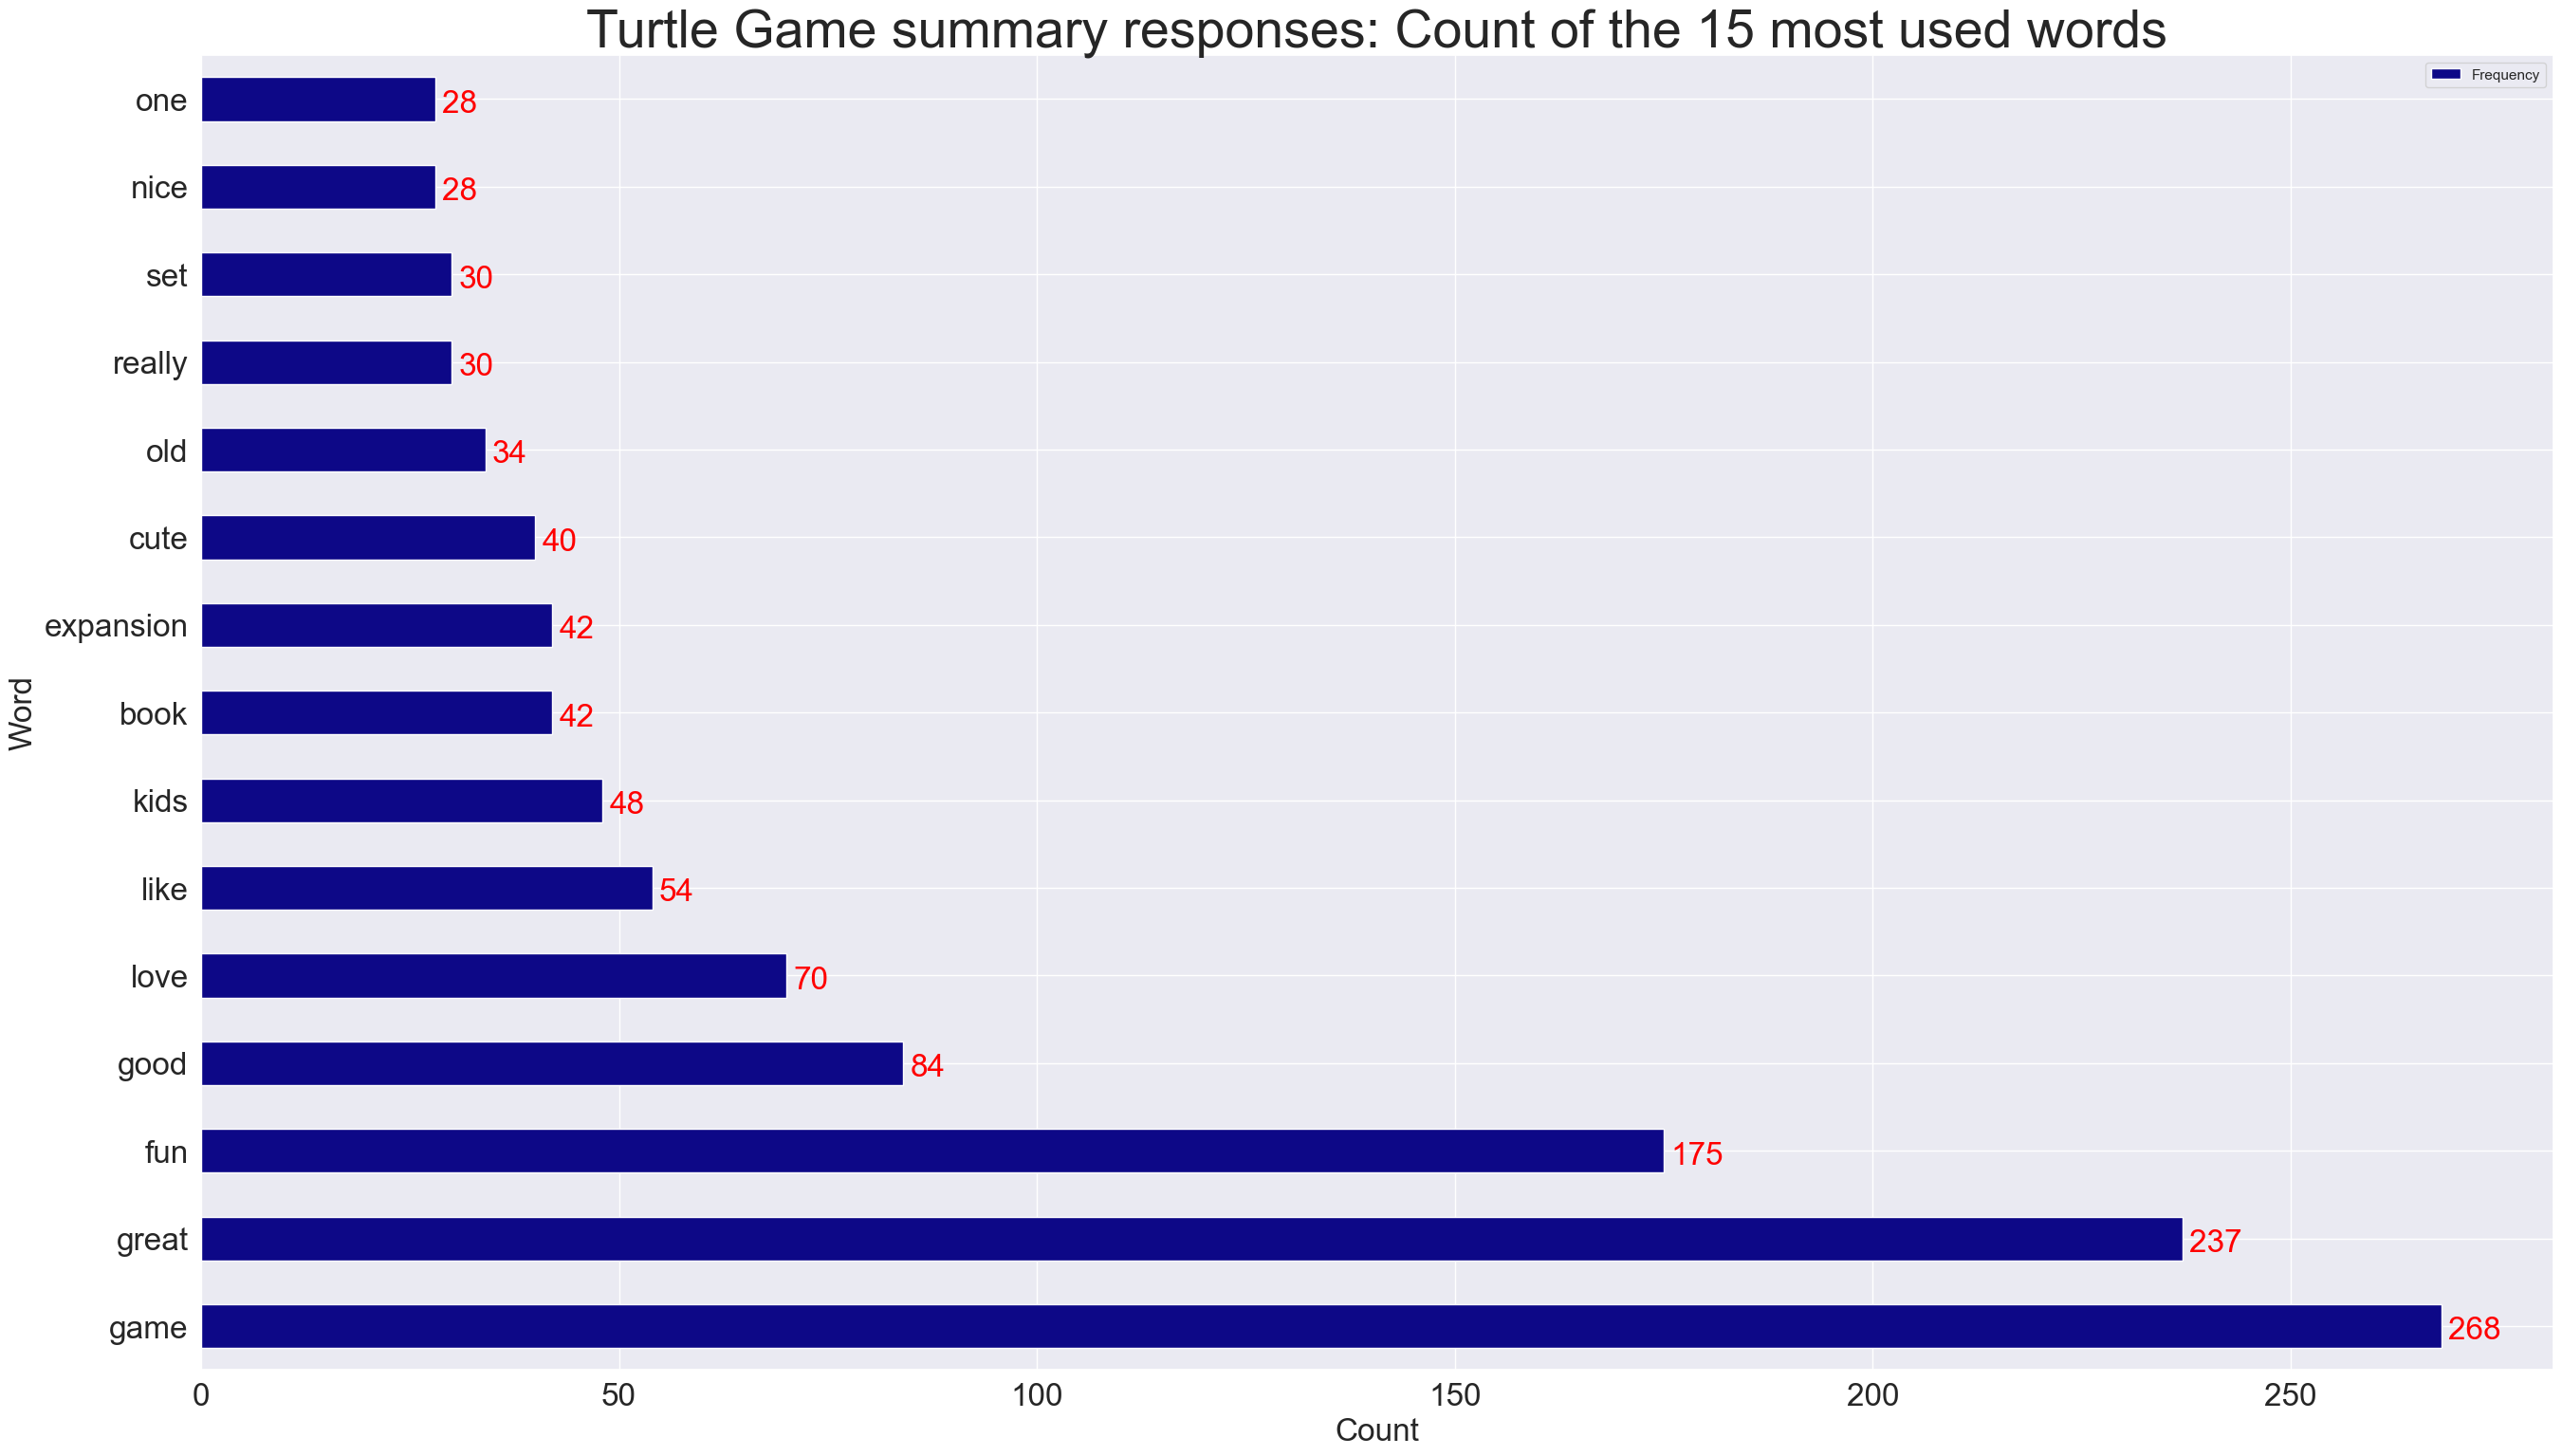

In [137]:
# Set the plot type.
ax = counts1.plot(kind='barh', figsize=(32, 18), fontsize=24,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=24)
ax.set_ylabel('Word', fontsize=24)
ax.set_title("Turtle Game summary responses: Count of the 15 most used words",
             fontsize=40)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.82, i.get_y()+.10, str(round((i.get_width()), 20)),
            fontsize=24, color='red')

# 5. Extract polarity and sentiment from the two column

In [138]:
# Define a function to extract a polarity score for the review.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each review.
rev['polarity'] = rev['review'].apply(generate_polarity)

# Preview the result.
rev['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

The function works by extracting the relevant score from the sentiment method for each review. 

In [139]:
# Define a function to extract a subjectivity score for the review.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each review.
rev['subjectivity'] = rev['review'].apply(generate_subjectivity)

# Preview the result.
rev['subjectivity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity, dtype: float64

Again, the function works by extracting the relevant score from the sentiment method for each review. which shows positive subjectivity.

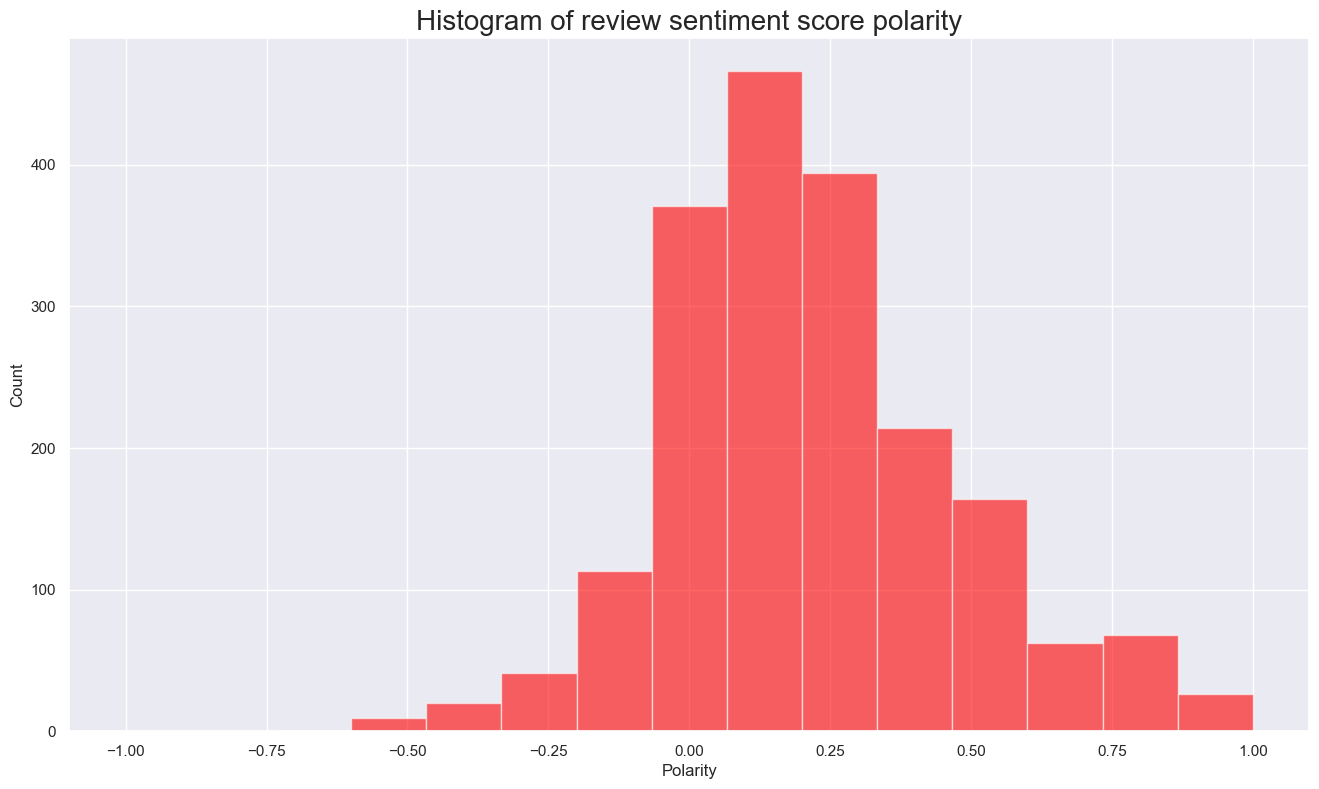

In [140]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(rev['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of review sentiment score polarity', fontsize=20)

plt.show()

This plot shows that most review expresses a positive sentiment direction.

In [141]:
# Define a function to extract a polarity score for the summary.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each summary.
summ['polarity'] = summ['summary'].apply(generate_polarity)

# Preview the result.
summ['polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity, dtype: float64

In [142]:
# Define a function to extract a subjectivity score for the review.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each review.
summ['subjectivity'] = rev['summary'].apply(generate_subjectivity)

# Preview the result.
summ['subjectivity'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity, dtype: float64

The function works by extracting the relevant score from the sentiment method for each summary. which shows positive subjectivity.

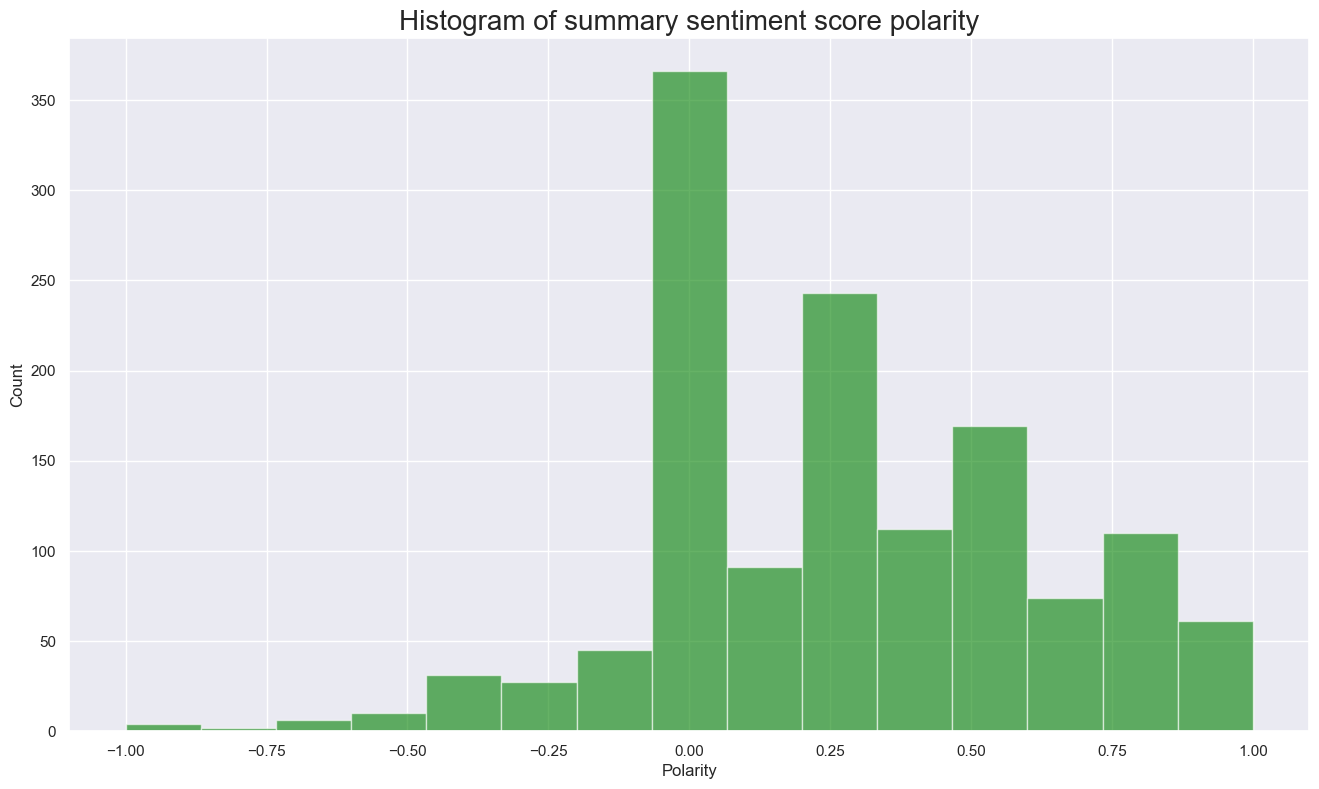

In [143]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(summ['polarity'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of summary sentiment score polarity', fontsize=20)

plt.show()

Though most customers are neutral in their summary, however, this plot shows that most summary expresses a positive sentiment direction.

# 6. Identify top 20 positive and negative reviews and summaries respectively

In [144]:
# Create a DataFrame for review
positive_sentiment = rev.nlargest(20, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['review', 'education', 'polarity', 'subjectivity']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,education,polarity,subjectivity
7,came in perfect condition,graduate,1.000000,1.000000
164,awesome book,PhD,1.000000,1.000000
193,awesome gift,graduate,1.000000,1.000000
489,excellent activity for teaching selfmanagement skills,postgraduate,1.000000,1.000000
517,perfect just what i ordered,graduate,1.000000,1.000000
583,wonderful product,diploma,1.000000,1.000000
601,delightful product,PhD,1.000000,1.000000
613,wonderful for my grandson to learn the resurrection story,postgraduate,1.000000,1.000000
782,perfect,PhD,1.000000,1.000000
922,awesome,graduate,1.000000,1.000000


In [145]:
# Create a DataFrame for review
negative_sentiment = rev.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['review', 'education', 'polarity', 'subjectivity']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,education,polarity,subjectivity
207,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,PhD,-1.000000,1.000000
181,incomplete kit very disappointing,PhD,-0.780000,0.910000
1766,im sorry i just find this product to be boring and to be frank juvenile,graduate,-0.583333,0.750000
362,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,Basic,-0.550000,0.300000
116,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,postgraduate,-0.500000,0.900000
226,this was a gift for my daughter i found it difficult to use,graduate,-0.500000,1.000000
229,i found the directions difficult,PhD,-0.500000,1.000000
289,instructions are complicated to follow,graduate,-0.500000,1.000000
300,difficult,graduate,-0.500000,1.000000
1496,expensive for what you get,graduate,-0.500000,0.700000


In [146]:
# Create a DataFrame for summary
positive_sentiment = summ.nlargest(20, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['summary', 'education', 'polarity', 'subjectivity']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,education,polarity,subjectivity
5,best gm screen ever,diploma,1.000000,0.000000
23,wonderful designs,PhD,1.000000,0.600000
27,perfect,PhD,1.000000,0.000000
61,theyre the perfect size to keep in the car or a diaper,graduate,1.000000,0.750000
107,perfect for preschooler,graduate,1.000000,0.350000
112,awesome sticker activity for the price,diploma,1.000000,0.500000
132,awesome book,graduate,1.000000,0.500000
133,he was very happy with his gift,graduate,1.000000,1.000000
150,awesome,PhD,1.000000,0.900000
166,awesome and welldesigned for 9 year olds,diploma,1.000000,0.562500


In [147]:
# Create a DataFrame for summary
negative_sentiment = summ.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['summary', 'education', 'polarity']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,education,polarity
17,the worst value ive ever seen,postgraduate,-1.000000
165,boring unless you are a craft person which i am,PhD,-1.000000
588,boring,graduate,-1.000000
838,before this i hated running any rpg campaign dealing with towns because it,PhD,-0.900000
1,another worthless dungeon masters screen from galeforce9,graduate,-0.800000
116,disappointed,postgraduate,-0.750000
266,promotes anger instead of teaching calming methods,graduate,-0.700000
635,too bad this is not what i was expecting,diploma,-0.700000
638,bad qualityall made of paper,graduate,-0.700000
144,at age 31 i found these very difficult to make,diploma,-0.650000
